### Import libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns
print("success")

success


### Data Descriptions

In [39]:
df = pd.read_csv("Datasets/udemy_courses_dataset.csv")

In [40]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


**Drop url column**

In [43]:
df = df.drop(columns=['url'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   is_paid              3678 non-null   bool   
 3   price                3678 non-null   int64  
 4   num_subscribers      3678 non-null   int64  
 5   num_reviews          3678 non-null   int64  
 6   num_lectures         3678 non-null   int64  
 7   level                3678 non-null   object 
 8   content_duration     3678 non-null   float64
 9   published_timestamp  3678 non-null   object 
 10  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 291.1+ KB


**Checking for missing values**

In [44]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

**Checking for duplicates**

In [45]:
dupes = df.duplicated()
dupes_count = dupes.sum()
print('Number of duplicates: ',dupes_count)

Number of duplicates:  6


In [46]:
dupes = df[df.duplicated(['course_id'], keep=False)]
dupes.sort_values('course_id')

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2478,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development
1234,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
1473,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
453,837322,Essentials of money value: Get a financial Life !,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
787,837322,Essentials of money value: Get a financial Life !,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
778,1035638,Understanding Financial Statements,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
894,1035638,Understanding Financial Statements,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
463,1084454,CFA Level 2- Quantitative Methods,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance


In [47]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   is_paid              3672 non-null   bool   
 3   price                3672 non-null   int64  
 4   num_subscribers      3672 non-null   int64  
 5   num_reviews          3672 non-null   int64  
 6   num_lectures         3672 non-null   int64  
 7   level                3672 non-null   object 
 8   content_duration     3672 non-null   float64
 9   published_timestamp  3672 non-null   object 
 10  subject              3672 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 319.1+ KB


In [48]:
dupes_new = df.duplicated()
dupes_new_count = dupes_new.sum()
print('Number of duplicates: ',dupes_new_count)

Number of duplicates:  0


**Checking for outliers**

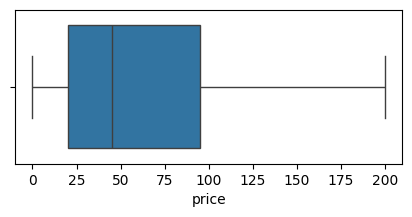

In [49]:
plt.figure(figsize=(5,2))
BP1 = sns.boxplot(df['price'], orient = 'h')

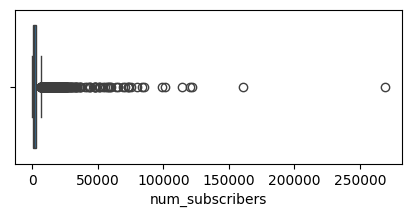

In [50]:
plt.figure(figsize=(5,2))
BP2 = sns.boxplot(df['num_subscribers'], orient='h')

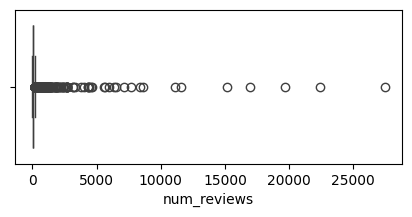

In [51]:
plt.figure(figsize=(5,2))
BP3 = sns.boxplot(df['num_reviews'], orient='h')

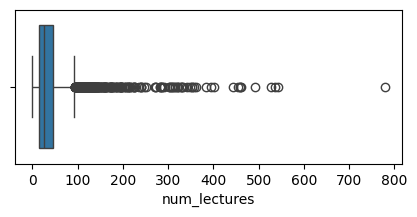

In [52]:
plt.figure(figsize=(5,2))
BP4 = sns.boxplot(df['num_lectures'], orient='h')

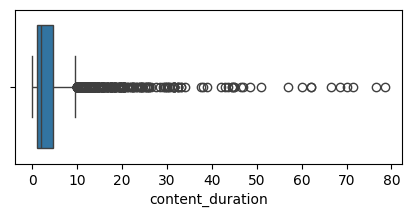

In [53]:
plt.figure(figsize=(5,2))
BP4 = sns.boxplot(df['content_duration'], orient='h')

In [54]:
file_name = 'udemy_dataset_cleaned.xlsx'
df.to_excel(file_name)

### Basic Visualization

/var/folders/vq/yk9spt_n1tn07hpjpl8kv6t00000gn/T/ipykernel_60336/2013158146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


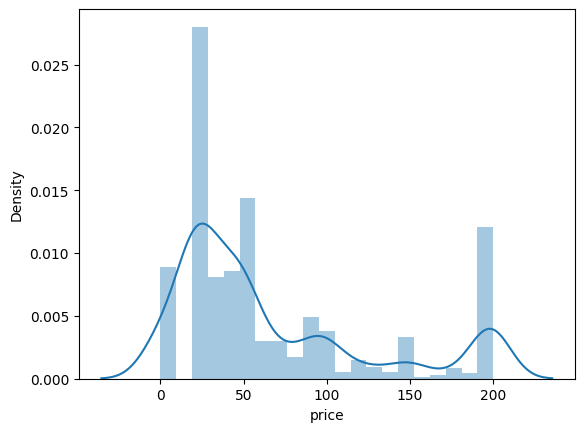

In [55]:
sns.distplot(df['price']);

/var/folders/vq/yk9spt_n1tn07hpjpl8kv6t00000gn/T/ipykernel_60336/3457343526.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_subscribers']);


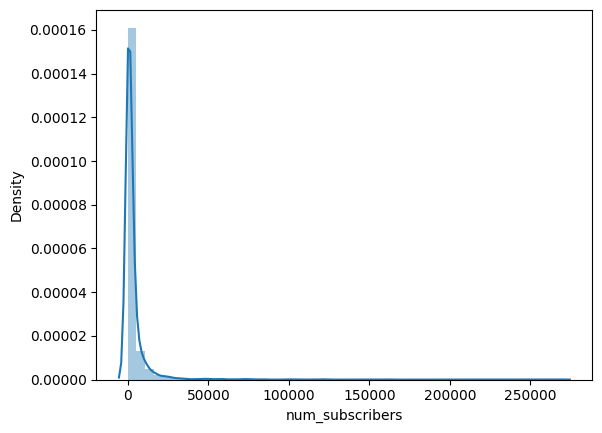

In [56]:
sns.distplot(df['num_subscribers']);

/var/folders/vq/yk9spt_n1tn07hpjpl8kv6t00000gn/T/ipykernel_60336/1511667708.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_reviews'])


<Axes: xlabel='num_reviews', ylabel='Density'>

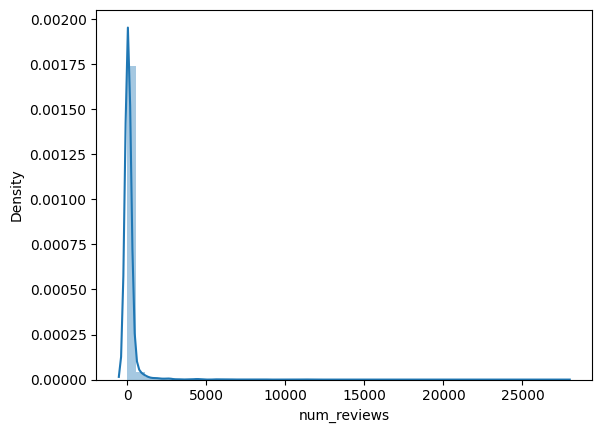

In [57]:
sns.distplot(df['num_reviews'])

/var/folders/vq/yk9spt_n1tn07hpjpl8kv6t00000gn/T/ipykernel_60336/2543712742.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_lectures'])


<Axes: xlabel='num_lectures', ylabel='Density'>

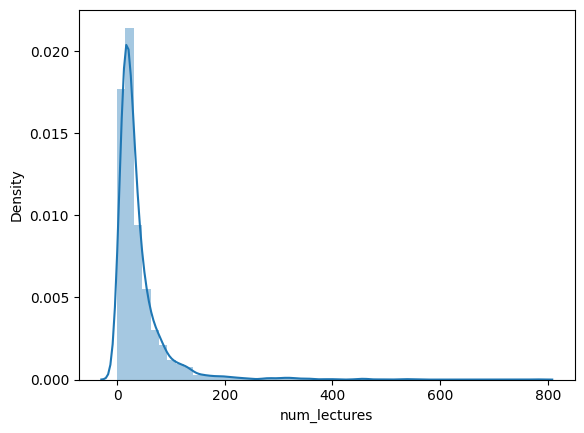

In [58]:
sns.distplot(df['num_lectures'])

/var/folders/vq/yk9spt_n1tn07hpjpl8kv6t00000gn/T/ipykernel_60336/654796478.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['content_duration'])


<Axes: xlabel='content_duration', ylabel='Density'>

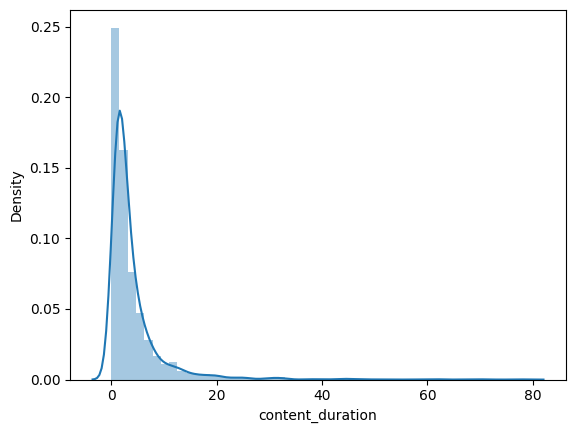

In [59]:
sns.distplot(df['content_duration'])

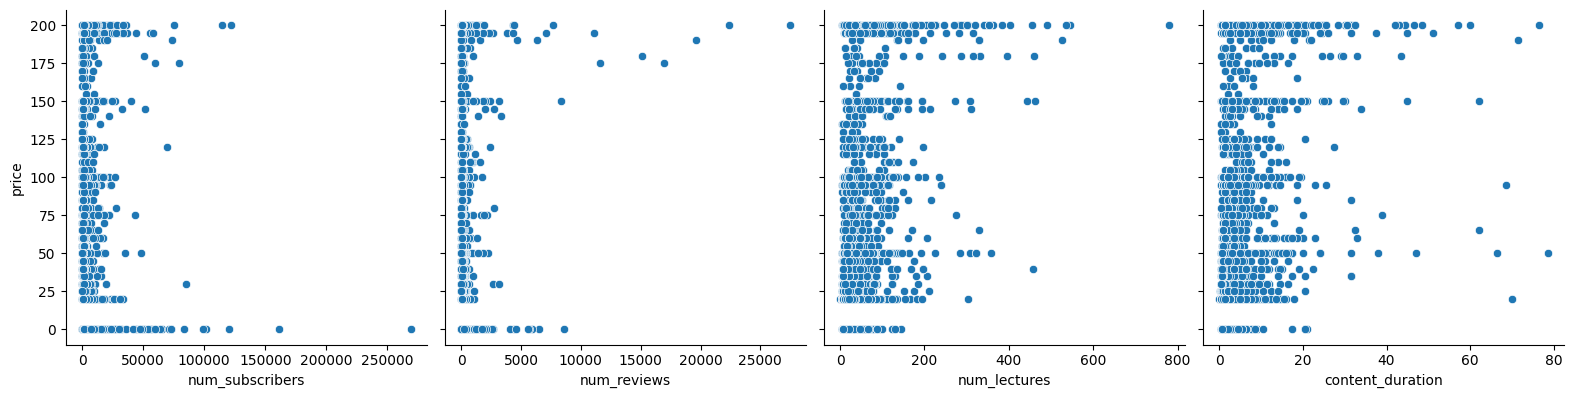

In [60]:
sns.pairplot(df, x_vars=['num_subscribers', 'num_reviews', 'num_lectures','content_duration'], y_vars='price', height=4, aspect=1, kind='scatter')
plt.show()

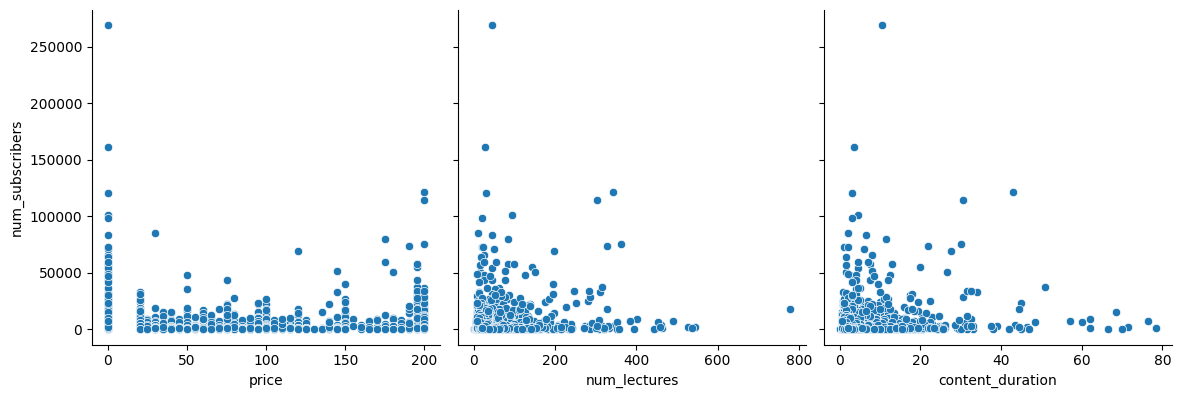

In [61]:
sns.pairplot(df, x_vars=['price', 'num_lectures','content_duration'], y_vars='num_subscribers', height=4, aspect=1, kind='scatter')
plt.show()

### Clustering

#### Cluster price, num of subs, num of reviews

In [62]:
clusterTable1 = df[['course_id','price','num_subscribers','num_reviews']]

In [63]:
clusterTable1

,course_id,price,num_subscribers,num_reviews
0,1070968,200,2147,23
1,1113822,75,2792,923
2,1006314,45,2174,74
3,1210588,95,2451,11
4,1011058,200,1276,45
...,...,...,...,...
3673,775618,100,1040,14
3674,1088178,25,306,3
3675,635248,40,513,169
3676,905096,50,300,31


In [64]:
clusterVar1 = clusterTable1.iloc[:,1:3].values

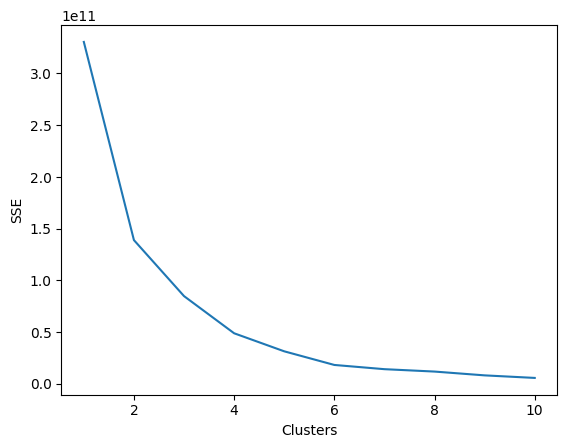

In [65]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(clusterVar1)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [66]:
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
clusterone = k_means_optimum.fit_predict(clusterVar1)
print(clusterone)

[0 0 0 ... 0 0 0]


In [67]:
clusterTable1['cluster'] = clusterone

/var/folders/vq/yk9spt_n1tn07hpjpl8kv6t00000gn/T/ipykernel_60336/57209038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusterTable1['cluster'] = clusterone


In [68]:
clusterTable1.sort_values('cluster')

,course_id,price,num_subscribers,num_reviews,cluster
0,1070968,200,2147,23,0
2297,1144288,20,8,1,0
2298,180680,50,376,9,0
2299,1031698,20,37,7,0
2300,62252,20,169,3,0
...,...,...,...,...,...
3071,101864,200,12873,106,2
3072,682484,75,12882,95,2
3062,566910,20,9028,87,2
2699,746014,195,12021,660,2


In [69]:
file_name = 'udemy_clustering1.xlsx'
clusterTable1.to_excel(file_name)

In [70]:
cluster1 = clusterTable1[clusterTable1.cluster==0]
cluster2 = clusterTable1[clusterTable1.cluster==1]
cluster3 = clusterTable1[clusterTable1.cluster==2]
cluster4 = clusterTable1[clusterTable1.cluster==3]

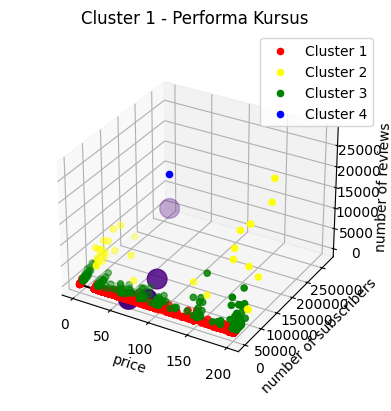

In [71]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(cluster1.price, cluster1.num_subscribers, cluster1.num_reviews, c='red', label = 'Cluster 1')
kplot.scatter3D(cluster2.price, cluster2.num_subscribers, cluster2.num_reviews,c ='yellow', label = 'Cluster 2')
kplot.scatter3D(cluster3.price, cluster3.num_subscribers, cluster3.num_reviews,c ='green', label = 'Cluster 3')
kplot.scatter3D(cluster4.price, cluster4.num_subscribers, cluster4.num_reviews,c ='blue', label = 'Cluster 4')

# Show plot
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Cluster 1 - Performa Kursus")
kplot.set_xlabel('price')
kplot.set_ylabel('number of subscribers')
kplot.set_zlabel('number of reviews')
kplot.set_box_aspect(None, zoom=0.85)
plt.show()

In [72]:
from sklearn.metrics import silhouette_score
score = silhouette_score(clusterVar1,clusterone)
print(score)

0.8300038586052956


#### Cluster price, num of lectures, content duration

In [73]:
clusterTable2 = df[['course_id','price','num_lectures','content_duration']]
clusterTable2

,course_id,price,num_lectures,content_duration
0,1070968,200,51,1.5
1,1113822,75,274,39.0
2,1006314,45,51,2.5
3,1210588,95,36,3.0
4,1011058,200,26,2.0
...,...,...,...,...
3673,775618,100,21,2.0
3674,1088178,25,42,3.5
3675,635248,40,48,3.5
3676,905096,50,38,3.0


In [74]:
clusterVar2 = clusterTable2.iloc[:,1:3].values

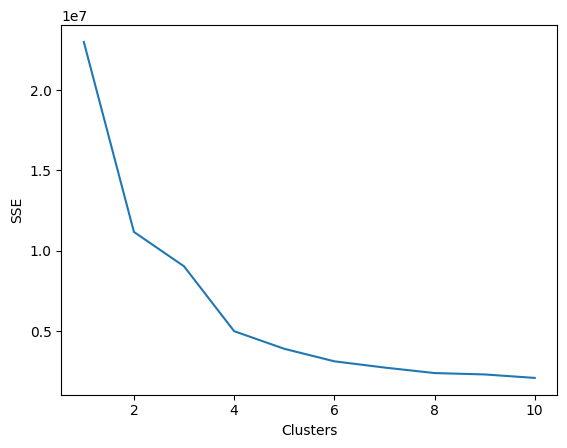

In [75]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(clusterVar2)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [76]:
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
clustertwo = k_means_optimum.fit_predict(clusterVar2)
print(clustertwo)

[2 3 0 ... 0 0 0]


In [77]:
clusterTable2['cluster']=clustertwo

/var/folders/vq/yk9spt_n1tn07hpjpl8kv6t00000gn/T/ipykernel_60336/3776717252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusterTable2['cluster']=clustertwo


In [78]:
clusterTable2.sort_values('cluster')

,course_id,price,num_lectures,content_duration,cluster
3677,297602,45,20,2.000000,0
1622,1252410,20,16,1.500000,0
1623,1216554,35,24,3.500000,0
2930,955138,35,9,0.566667,0
1625,1133764,20,18,1.000000,0
...,...,...,...,...,...
2636,473548,200,221,18.000000,3
1658,978576,50,225,78.500000,3
500,521342,200,211,19.500000,3
3200,822444,200,191,31.500000,3


In [79]:
file_name = 'udemy_clustering2.xlsx'
clusterTable2.to_excel(file_name)

In [80]:
clusterr1 = clusterTable2[clusterTable2.cluster==0]
clusterr2 = clusterTable2[clusterTable2.cluster==1]
clusterr3 = clusterTable2[clusterTable2.cluster==2]
clusterr4 = clusterTable2[clusterTable2.cluster==3]

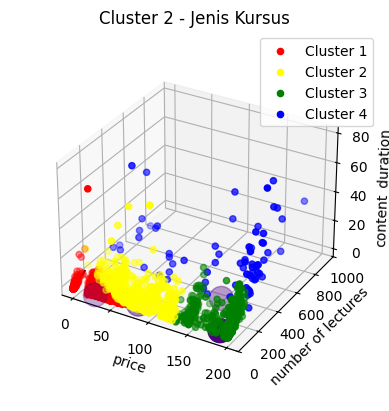

In [81]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(clusterr1.price, clusterr1.num_lectures, clusterr1.content_duration, c='red', label = 'Cluster 1')
kplot.scatter3D(clusterr2.price, clusterr2.num_lectures, clusterr2.content_duration,c ='yellow', label = 'Cluster 2')
kplot.scatter3D(clusterr3.price, clusterr3.num_lectures, clusterr3.content_duration,c ='green', label = 'Cluster 3')
kplot.scatter3D(clusterr4.price, clusterr4.num_lectures, clusterr4.content_duration,c ='blue', label = 'Cluster 4')

plt.ylim(0.0, 1000)

# Show plot
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 300)
plt.legend()
plt.title("Cluster 2 - Jenis Kursus")
kplot.set_xlabel('price')
kplot.set_ylabel('number of lectures')
kplot.set_zlabel('content_duration', rotation = 90)
kplot.set_box_aspect(None, zoom=0.85)
plt.show()

In [82]:
from sklearn.metrics import silhouette_score
score = silhouette_score(clusterVar2,clustertwo)
print(score)

0.5123596994814393


## Regression

### Set up

In [83]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [84]:
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [326]:
# change level to numerical value
df['level_dif'] = df['level'].map({
    "All Levels": 1,
    "Beginner Level": 0,
    "Intermediate Level": 2,
    "Expert Level": 3
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   is_paid              3672 non-null   bool   
 3   price                3672 non-null   int64  
 4   num_subscribers      3672 non-null   int64  
 5   num_reviews          3672 non-null   int64  
 6   num_lectures         3672 non-null   int64  
 7   level                3672 non-null   object 
 8   content_duration     3672 non-null   float64
 9   published_timestamp  3672 non-null   object 
 10  subject              3672 non-null   object 
 11  level_dif            3672 non-null   int64  
dtypes: bool(1), float64(1), int64(6), object(4)
memory usage: 476.9+ KB


In [86]:
df[['level','level_dif']]

,level,level_dif
0,All Levels,1
1,All Levels,1
2,Intermediate Level,2
3,All Levels,1
4,Intermediate Level,2
...,...,...
3673,All Levels,1
3674,Beginner Level,0
3675,All Levels,1
3676,All Levels,1


In [327]:
# create dataframe for regression
df_reg = df[['num_subscribers','price','num_lectures','content_duration','level_dif']]
df_reg

,num_subscribers,price,num_lectures,content_duration,level_dif
0,2147,200,51,1.5,1
1,2792,75,274,39.0,1
2,2174,45,51,2.5,2
3,2451,95,36,3.0,1
4,1276,200,26,2.0,2
...,...,...,...,...,...
3673,1040,100,21,2.0,1
3674,306,25,42,3.5,0
3675,513,40,48,3.5,1
3676,300,50,38,3.0,1


<Axes: >

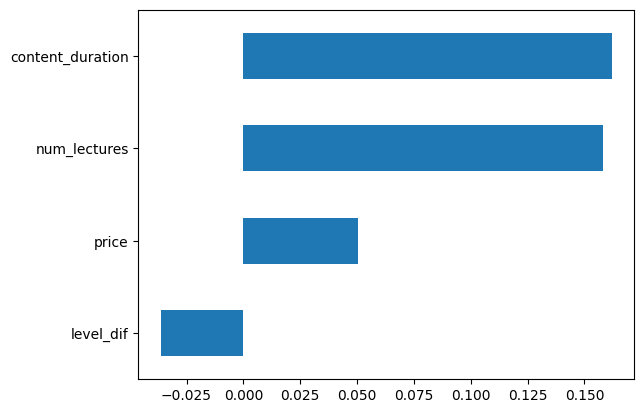

In [328]:
# identifying effect of variables
df_reg.corr()['num_subscribers'].sort_values().head(11)[:-1].plot.barh()

In [122]:
# Setting variables
x = df[['price','num_lectures','content_duration','level_dif']]
y = df['num_subscribers']

#### Visualization

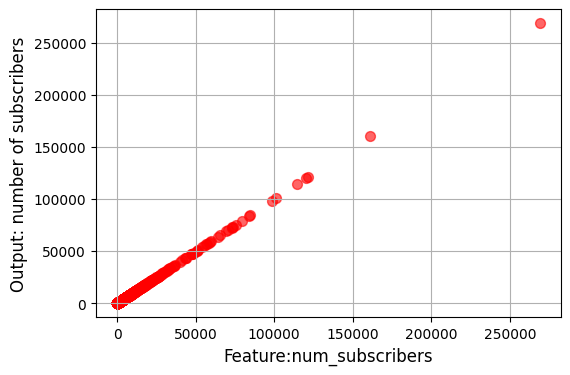

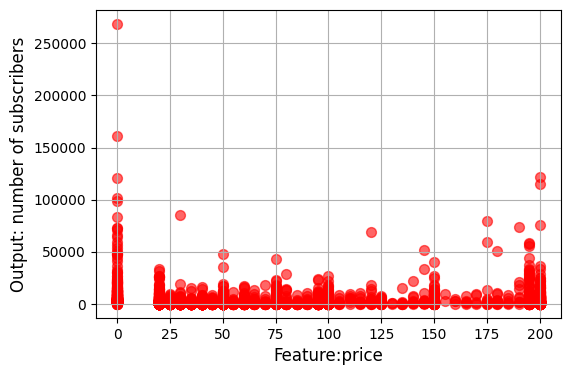

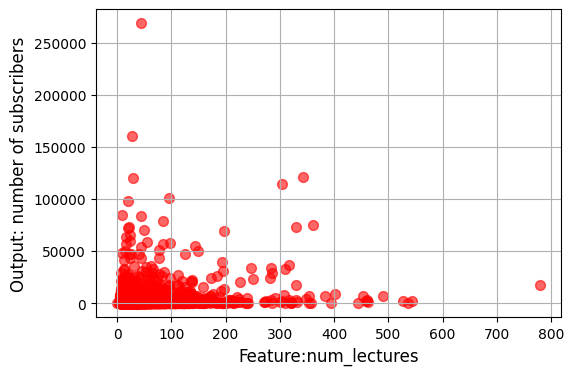

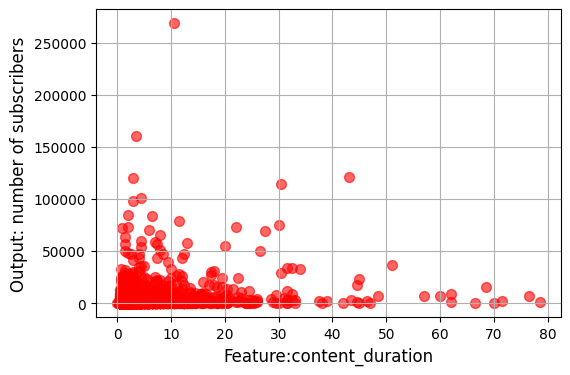

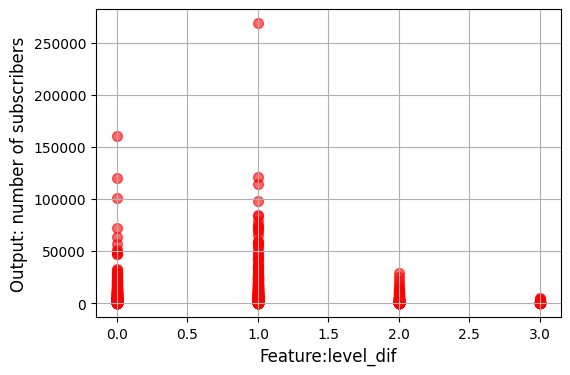

In [337]:
# Visualizing effect of variables to number of subscribers
for i,col in enumerate(df_reg.columns[:5]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: number of subscribers',fontsize=12)
        plt.scatter(Reg[col],Reg['num_subscribers'],c='red',s=50,alpha=0.6)

In [365]:
# Defining performance metrics function
from sklearn import metrics

results = {}
def eval_metrics(actual, pred, key):
    score = metrics.r2_score(actual, pred)
    MAE = metrics.mean_absolute_error(actual, pred)
    MSE = metrics.mean_squared_error(actual, pred)
    RMSE = np.sqrt(metrics.mean_squared_error(actual, pred))
    MAPE = metrics.mean_absolute_percentage_error(actual, pred)

    results[key] = {'r2_score': score, 'MAE':MAE, 'MSE':MSE, 'RMSE':RMSE, 'MAPE':MAPE}

    print('r2_score:', score)
    print('Mean Absolute Error:', MAE)
    print('Mean Square Error:', MSE)
    print('Root Mean Square Error:', RMSE)
    print('Mean Absolute Percentage Error:', MAPE)

In [128]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Linear Regression

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [184]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  3302.8241245136187
Coefficients:


[('price', np.float64(24.98599464900062)),
 ('num_lectures', np.float64(1112.0586691239912)),
 ('content_duration', np.float64(1011.1086950609142)),
 ('level_dif', np.float64(-404.9563163204444))]

In [185]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [3548.64847079 3799.90494928 1647.87052407 ... 3987.22923636 2265.0782138
 3884.89682464]


In [186]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
309,115,3548.648471
3394,942,3799.904949
2902,2547,1647.870524
403,7159,2400.056815
3616,334,4159.105906
...,...,...
141,6050,2802.043020
1745,32,2931.840946
1045,4,3987.229236
1535,314,2265.078214


In [187]:
# Predict from any value
mlr.predict([[50,5,10,1]])

array([19818.54783687])

In [366]:
# Print evaluation metrics
eval_metrics(y_test, y_pred_mlr, 'Linear Regression')

r2_score: -0.017108480654592917
Mean Absolute Error: 3686.6852550107983
Mean Square Error: 69543887.44949995
Root Mean Square Error: 8339.297779159822
Mean Absolute Percentage Error: 1.8122359848760454e+17


<function matplotlib.pyplot.show(close=None, block=None)>

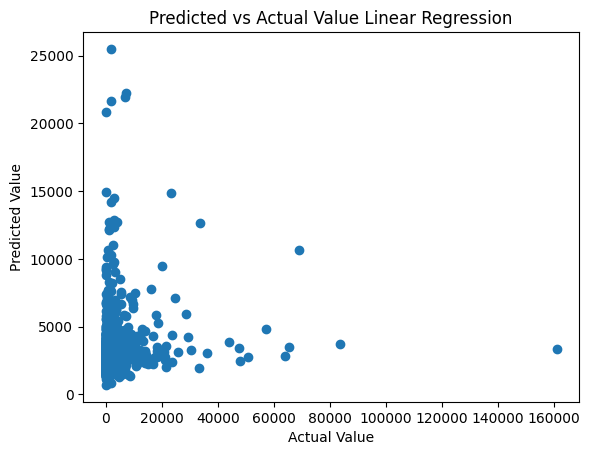

In [341]:
# Plot predicted value to actual value
plt.scatter(y_test, y_pred_mlr)
plt.title('Predicted vs Actual Value Linear Regression')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show

In [342]:
# Cross validation 
from sklearn.model_selection import KFold
k = 10 
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [243]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(mlr, x, y, cv=kf, scoring='r2')

In [343]:
# Print cross validation score
average_r2 = np.mean(scores) 

print(f"R² Score for each fold: {[round(score, 4) for score in scores]}")
print(f"Average R² across {k} folds: {average_r2:.2f}")

R² Score for each fold: [np.float64(0.1906), np.float64(-0.4508), np.float64(-0.4186), np.float64(-0.2381), np.float64(-0.3235), np.float64(-0.5545), np.float64(0.1719), np.float64(0.1219), np.float64(0.0255), np.float64(0.0886)]
Average R² across 10 folds: -0.14


<Axes: >

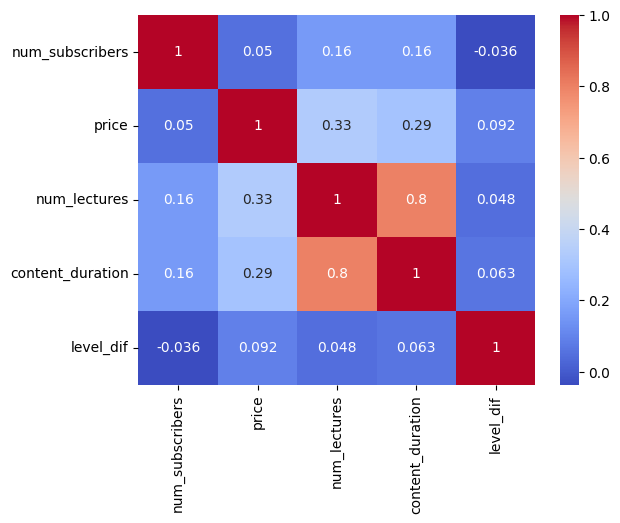

In [344]:
# Show multicollinearity
sns.heatmap(df_reg.corr(),annot=True, cmap='coolwarm')

### Ridge Regression

In [192]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [345]:
# Using ridge regression
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

In [367]:
# Print evaluation metrics
eval_metrics(y_test, y_pred_ridge, 'Ridge Regression')

r2_score: -0.016753925967182504
Mean Absolute Error: 3686.2220948295917
Mean Square Error: 69519645.08819342
Root Mean Square Error: 8337.844151109652
Mean Absolute Percentage Error: 1.8150913846960928e+17


In [235]:
## hyperparameter tuning (alpha)
alpha_space = np.linspace(0.1, 20, 100)

In [236]:
ridgeCV = RidgeCV(alphas = alpha_space, cv = 5)
ridgeCV.fit(x_train, y_train)
ridgeCV.alpha_

np.float64(20.0)

In [348]:
# Re-run model after tuning
ridge_model = Ridge(alpha=20)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

In [368]:
# Re-print evaluation metrics
eval_metrics(y_test, y_pred_ridge, 'Ridge Regression tuned')

r2_score: -0.016753925967182504
Mean Absolute Error: 3686.2220948295917
Mean Square Error: 69519645.08819342
Root Mean Square Error: 8337.844151109652
Mean Absolute Percentage Error: 1.8150913846960928e+17


### Random Forest Regresssion

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [349]:
# Using random forest model
rf = RandomForestRegressor(random_state = 42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [264]:
y_pred_rf= rf.predict(x_test)
print("Prediction for test set: {}".format(y_pred_rf))

Prediction for test set: [1585.78       3661.59        989.4        ... 3100.77        710.72133333
 1676.99      ]


In [250]:
#Actual value and the predicted value
rf_diff = pd.DataFrame({'Actual value': y_test, 'RF Predicted value': y_pred_rf, 'MLR Predicted value': y_pred_mlr})
rf_diff

,Actual value,RF Predicted value,MLR Predicted value
309,115,1585.780000,3548.648471
3394,942,3661.590000,3799.904949
2902,2547,989.400000,1647.870524
403,7159,1247.415000,2400.056815
3616,334,2692.090000,4159.105906
...,...,...,...
141,6050,2872.905714,2802.043020
1745,32,4515.267500,2931.840946
1045,4,3100.770000,3987.229236
1535,314,710.721333,2265.078214


In [369]:
# Print evaluation metrics
eval_metrics(y_test, y_pred_rf, 'Random Forest Regression')

r2_score: -0.0829554306103697
Mean Absolute Error: 3573.9638139331933
Mean Square Error: 74046114.06909345
Root Mean Square Error: 8605.00517542514
Mean Absolute Percentage Error: 8.546717959205968e+16


<function matplotlib.pyplot.show(close=None, block=None)>

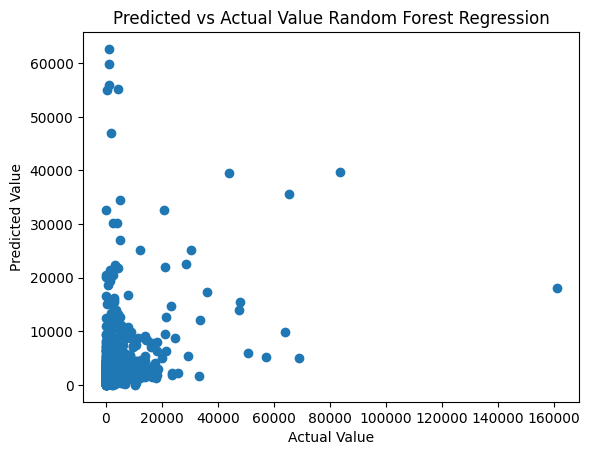

In [351]:
# Plot predicted value to actual value
plt.scatter(y_test, y_pred_rf)
plt.title('Predicted vs Actual Value Random Forest Regression')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show

In [253]:
# cross validation 
from sklearn.model_selection import KFold
k = 10 
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [270]:
from sklearn.model_selection import cross_val_score 
scorerf = cross_val_score(rf, x, y, cv=kf, scoring='r2')

In [271]:
average_r2 = np.mean(scorerf) 

print(f"R² Score for each fold: {[round(score, 4) for score in scorerf]}")
print(f"Average R² across {k} folds: {average_r2:.2f}")

R² Score for each fold: [np.float64(0.1906), np.float64(-0.4508), np.float64(-0.4186), np.float64(-0.2381), np.float64(-0.3235), np.float64(-0.5545), np.float64(0.1719), np.float64(0.1219), np.float64(0.0255), np.float64(0.0886)]
Average R² across 10 folds: -0.14


**Hyperparameter Tuning**

In [352]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,200,300,400,500],
    'max_depth': [None, 5, 10, 15, 20]}

In [261]:
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [353]:
# Best hyperparameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

Best Parameters: {'max_depth': 5, 'n_estimators': 500}
Best Score (MSE): 81297908.46274646


In [354]:
# Re-run model with best parameter
rf_best = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
rf_best.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=42)

In [265]:
y_pred_rf_best= rf_best.predict(x_test)
print("Prediction for test set: {}".format(y_pred_rf_best))

Prediction for test set: [1537.61733449 3485.78155229 2683.1128146  ... 5644.98959555 1510.01219936
 2634.66841992]


In [267]:
#Actual value and the predicted value
rf2_diff = pd.DataFrame({'Actual value': y_test,'MLR Predicted value': y_pred_mlr, 'RF Predicted value': y_pred_rf, 'RF2 Predicted value': y_pred_rf_best})
rf2_diff

,Actual value,MLR Predicted value,RF Predicted value,RF2 Predicted value
309,115,3548.648471,1585.780000,1537.617334
3394,942,3799.904949,3661.590000,3485.781552
2902,2547,1647.870524,989.400000,2683.112815
403,7159,2400.056815,1247.415000,2819.362853
3616,334,4159.105906,2692.090000,2695.697213
...,...,...,...,...
141,6050,2802.043020,2872.905714,1505.512620
1745,32,2931.840946,4515.267500,2833.556103
1045,4,3987.229236,3100.770000,5644.989596
1535,314,2265.078214,710.721333,1510.012199


In [370]:
# Re-print evalulation metrics
eval_metrics(y_test, y_pred_rf_best, "Random Forest Regression tuned")

r2_score: 0.03898969364921179
Mean Absolute Error: 3339.5708213109247
Mean Square Error: 65708224.691683374
Root Mean Square Error: 8106.060984947213
Mean Absolute Percentage Error: 1.2355478592049141e+17


<function matplotlib.pyplot.show(close=None, block=None)>

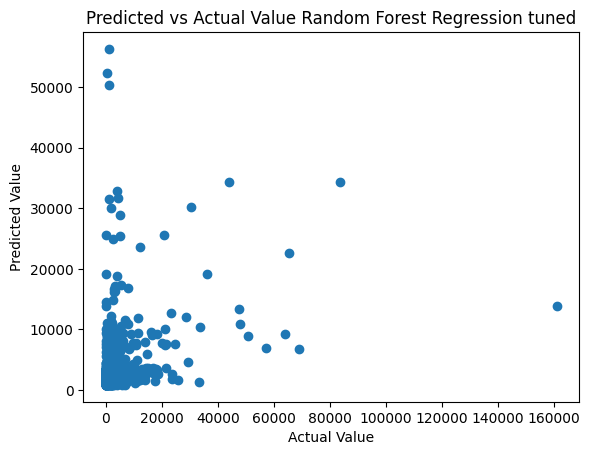

In [372]:
# Plot predicted value to actual value
plt.scatter(y_test, y_pred_rf_best)
plt.title('Predicted vs Actual Value Random Forest Regression tuned')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show

In [373]:
# Cross validation
scorerf2 = cross_val_score(rf_best, x, y, cv=kf, scoring='r2')

In [275]:
average_r2_rf2 = np.mean(scorerf2) 

print(f"R² Score for each fold: {[round(score, 4) for score in scorerf2]}")
print(f"Average R² across {k} folds: {average_r2_rf2:.2f}")

R² Score for each fold: [np.float64(0.2447), np.float64(-0.1008), np.float64(-0.2745), np.float64(-0.0372), np.float64(0.0261), np.float64(-0.1292), np.float64(0.1802), np.float64(0.0988), np.float64(0.1519), np.float64(0.1423)]
Average R² across 10 folds: 0.03


### XGBoost

In [284]:
import xgboost as xgboost

In [374]:
# Using XGBoost Regressor
xg = xgboost.XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [287]:
y_pred_xg = xg.predict(x_test)
print("Prediction for test set: {}".format(y_pred_xg))

Prediction for test set: [ 1852.4263   3101.3794    646.14453 ... -1808.3237   1416.8074
  2389.4626 ]


In [288]:
#Actual value and the predicted value
xg_diff = pd.DataFrame({'Actual value': y_test,'MLR Predicted value': y_pred_mlr, 'RF Predicted value': y_pred_rf, 'RF2 Predicted value': y_pred_rf_best, 'XGBoost Predicted value':y_pred_xg})
xg_diff

,Actual value,MLR Predicted value,RF Predicted value,RF2 Predicted value,XGBoost Predicted value
309,115,3548.648471,1585.780000,1537.617334,1852.426270
3394,942,3799.904949,3661.590000,3485.781552,3101.379395
2902,2547,1647.870524,989.400000,2683.112815,646.144531
403,7159,2400.056815,1247.415000,2819.362853,1365.782837
3616,334,4159.105906,2692.090000,2695.697213,1051.734863
...,...,...,...,...,...
141,6050,2802.043020,2872.905714,1505.512620,1527.868652
1745,32,2931.840946,4515.267500,2833.556103,4585.825684
1045,4,3987.229236,3100.770000,5644.989596,-1808.323730
1535,314,2265.078214,710.721333,1510.012199,1416.807373


In [375]:
# Print evaluation metrics
eval_metrics(y_test, y_pred_xg, 'XGBoost')

r2_score: -0.24353277683258057
Mean Absolute Error: 3628.0074887117757
Mean Square Error: 85025461.70536678
Root Mean Square Error: 9220.925208750301
Mean Absolute Percentage Error: 5.1581386787910424e+16


<function matplotlib.pyplot.show(close=None, block=None)>

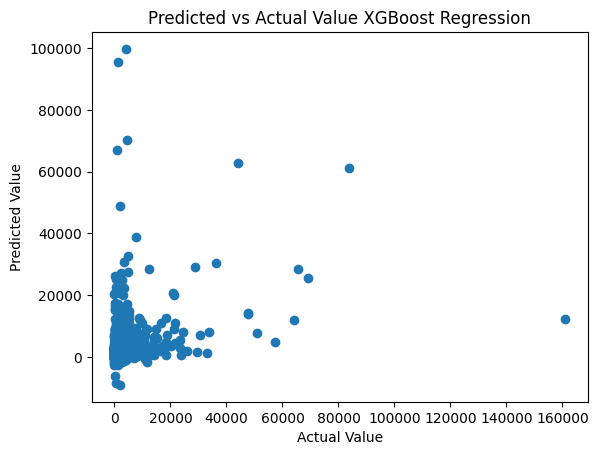

In [376]:
# Plot predicted value to actual value
plt.scatter(y_test, y_pred_xg)
plt.title('Predicted vs Actual Value XGBoost Regression')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show

In [377]:
# Cross validation
scorexg = cross_val_score(xg, x, y, cv=kf, scoring='r2')

In [292]:
average_r2_xg = np.mean(scorexg) 

print(f"R² Score for each fold: {[round(score, 4) for score in scorexg]}")
print(f"Average R² across {k} folds: {average_r2_xg:.2f}")

R² Score for each fold: [np.float64(0.2066), np.float64(-0.6294), np.float64(-0.9344), np.float64(-0.3845), np.float64(-0.5267), np.float64(-0.5722), np.float64(0.2171), np.float64(0.0666), np.float64(-0.4399), np.float64(0.0725)]
Average R² across 10 folds: -0.29


### Comparison between Models

In [378]:
results

{'Linear Regression': {'r2_score': -0.017108480654592917,
  'MAE': np.float64(3686.6852550107983),
  'MSE': np.float64(69543887.44949995),
  'RMSE': np.float64(8339.297779159822),
  'MAPE': np.float64(1.8122359848760454e+17)},
 'Ridge Regression': {'r2_score': -0.016753925967182504,
  'MAE': np.float64(3686.2220948295917),
  'MSE': np.float64(69519645.08819342),
  'RMSE': np.float64(8337.844151109652),
  'MAPE': np.float64(1.8150913846960928e+17)},
 'Ridge Regression tuned': {'r2_score': -0.016753925967182504,
  'MAE': np.float64(3686.2220948295917),
  'MSE': np.float64(69519645.08819342),
  'RMSE': np.float64(8337.844151109652),
  'MAPE': np.float64(1.8150913846960928e+17)},
 'Random Forest Regression': {'r2_score': -0.0829554306103697,
  'MAE': np.float64(3573.9638139331933),
  'MSE': np.float64(74046114.06909345),
  'RMSE': np.float64(8605.00517542514),
  'MAPE': np.float64(8.546717959205968e+16)},
 'Random Forest Regression tuned': {'r2_score': 0.03898969364921179,
  'MAE': np.floa

In [379]:
results_comp = pd.DataFrame(results).transpose().sort_values(by='r2_score', ascending=False)
results_comp

,r2_score,MAE,MSE,RMSE,MAPE
Random Forest Regression tuned,0.038990,3339.570821,6.570822e+07,8106.060985,1.235548e+17
Ridge Regression,-0.016754,3686.222095,6.951965e+07,8337.844151,1.815091e+17
Ridge Regression tuned,-0.016754,3686.222095,6.951965e+07,8337.844151,1.815091e+17
Linear Regression,-0.017108,3686.685255,6.954389e+07,8339.297779,1.812236e+17
Random Forest Regression,-0.082955,3573.963814,7.404611e+07,8605.005175,8.546718e+16
XGBoost,-0.243533,3628.007489,8.502546e+07,9220.925209,5.158139e+16


In [397]:
def highlight_rank(s, ascending=True):
    # Sort the series and assign ranks (ascending determines the ranking direction)
    ranks = s.rank(method='min', ascending=ascending)
    colors = ['background-color: #4CAF50',  # Best (rank 1)
              'background-color: #8BC34A',   # Second best (rank 2)
              'background-color: #C5E1A5', # Third best (rank 3)
              'background-color: #FFEB8E', # Fourth best (rank 4)
              'background-color: #FFB74D', # Fifth best (rank 5)
              'background-color: #FF7043']  # Fourth (worst)

    # Map ranks to colors
    return [colors[int(rank) - 1] for rank in ranks]

In [398]:
results_coloured = results_comp.style.apply(lambda s: highlight_rank(s, ascending=False) if s.name == 'r2_score' else highlight_rank(s, ascending=True),
                           subset=['r2_score', 'MAE', 'MSE', 'RMSE', 'MAPE'], axis=0)
results_coloured

,r2_score,MAE,MSE,RMSE,MAPE
Random Forest Regression tuned,0.038990,3339.570821,65708224.691683,8106.060985,123554785920491408.000000
Ridge Regression,-0.016754,3686.222095,69519645.088193,8337.844151,181509138469609280.000000
Ridge Regression tuned,-0.016754,3686.222095,69519645.088193,8337.844151,181509138469609280.000000
Linear Regression,-0.017108,3686.685255,69543887.449500,8339.297779,181223598487604544.000000
Random Forest Regression,-0.082955,3573.963814,74046114.069093,8605.005175,85467179592059680.000000
XGBoost,-0.243533,3628.007489,85025461.705367,9220.925209,51581386787910424.000000
